<h1 style="border:1px solid green;padding:10px 10px 10px 10px;text-align: center;"><u style="color:MediumSeaGreen">Understanding the risk associated with lending various types of loans</u></h1>
<hr>
<div style="text-align: justify;color:MediumSeaGreen;font-size: 18px;font-family: "Times New Roman", Times, serif;">
<p style="text-indent:1cm;">
    Consumer finance companies specializes in providing loans (Financial Aids) to people. However, many times the firm incur loss due to lender defaulting on required payments.</p>
<p style="text-indent:1cm;">
    In this notebook, I have tried to analyze the pattern from given data which aims to indicate risk free lending. Two types of risks are associated with the firm's decision:
<ul>
    <li>If the applicant is <b>likely to repay the loan</b>, then <b>not approving</b> the loan results in a <b>loss of business</b> to the company</li>
    <li>If the applicant is <b>not likely to repay the loan</b>, i.e. he/she is likely to default, then <b>approving</b> the loan may lead to a <b>financial loss</b> for the company</li>
</ul>
</p>
</div>


<div style="text-align: justify;color:MediumSeaGreen;font-size: 18px;font-family: "Times New Roman", Times, serif;">
<p style="text-indent:1cm;">
    Loans that are accepted are either paid off completely or are defaulted. These categories are defined as:
    <ol>
        <li><b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)</li>
        <li><b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'</li>
        <li><b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan</li>
    </ol>
</p></div>

<hr>
<div style="text-align: justify;color:blue;font-size: 18px;font-family: "Times New Roman", Times, serif;">
The data belongs to a financial firm running largest online loan marketplace have products like:<br>
<ul>
    <li>Personal loans</li>
    <li>Business loans</li>
    <li>Medical loans</li>
</ul>
In case, loan is defaulted the firm looses money and leads to <b>credit loss</b>
<br><br>
<h5 style="border:1px solid red;padding:10px 10px 10px 10px;text-align: center;"><span style="color: red;">
<i>The aim of this document is to explore the past data and identify patterns that led to defaults on loan or are  risky to approve. Hence, reducing the credit loss</i>
</h5>
</div>

<hr>
<h5 style="border:1px solid green;padding:10px 10px 10px 10px;text-align: center;"><span style="color: green;">
Step 1. Data Understanding
</h5>


In [12]:
# Generic Functions

# Function to plot missing values count in given dataframe
def plot_missing_value_count(raw_data, tlt='Missing Values Plot'):
    null_values = raw_data.isnull().sum()
    null_dataset = pd.DataFrame({'Fields': null_values.index, 'Count': null_values.values})
    null_dataset = null_dataset[null_dataset['Count']>0]

    null_dataset.plot.bar(x='Fields', title=tlt, figsize=(20,10))

    plt.show()
    
# Function to print number of rows and columns
def print_rows_columns(data, tlt='DATA FOR ROWS & COLUMNS'):
    rows, cols = data.shape
    
    print("[{}] Number of Rows are {}".format(tlt, rows))
    print("[{}] Number of Columns are {}\n".format(tlt, cols))
    
# Function to clean the data in generic way
def clean_data(data, tlt='CLEANED DATA'):
    data = data.dropna()
    
    return data

In [13]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Set appropriate flags useful for smoth working
pd.options.mode.chained_assignment = None  # default='warn'

# Read the data file
# setting low_memory=False allows entire reading file and then processing
raw_dataset = pd.read_csv("loan.csv", low_memory=False)

# Set required options
pd.set_option("display.max.columns", None)

# Display Rows and Columns on data set
print_rows_columns(raw_dataset)


[DATA FOR ROWS & COLUMNS] Number of Rows are 39717
[DATA FOR ROWS & COLUMNS] Number of Columns are 111



<h4>Important Columns</h4>
<Ol>
<li style='color:green'>loan_amnt: Loan Amount. Important to understand the amount approved for given loan.</li>
<li style='color:green'>funded_amnt: Amount that is funded by the agency</li>
<li style='color:green'>funded_amnt_inv: Amount approved by investor for given loan</li>
<li style='color:green'>term: Payment duration in months</li>
<li style='color:green'>int_rate: Interest rate on loan</li>
<li style='color:green'>installment: Monthly installments </li>
<li style='color:green'>grade: Quality score for the assigned loan</li>
<li style='color:green'>sub_grade: Quality subgrade for loan</li>
<li style='color:green'>emp_length: Length of employment</li>
<li style='color:green'>home_ownership: Type of Residential ownership</li>
<li style='color:green'>annual_inc: Anual Income</li>
<li style='color:green'>verification_status: Income verification by Lending Club</li>
<li style='color:green'>purpose: Porpose of borrowing</li>
<li style='color:green'>title: Loan title provided by borrower</li>
<li style='color:green'>zip_code:  Indicates area from where the loan was registered</li>
<li style='color:green'>addr_state: Indicates area by name where loan was registered</li>
<li style='color:green'>dti: Debt to income</li>
<li style='color:green'>open_acc: Number of open credit line in borrowers credit file</li>
<li style='color:green'>pub_rec: Number of negative public records</li>
<li style='color:green'>revol_bal: Revolving credit capacity of user</li>
<li style='color:green'>revol_util: Relative Revolving balance</li>
<li style='color:green'>total_acc: Number of credit lines for borrower</li>
<li style='color:green'>application_type: Application type</li>
</uO>

<h5 style="border:1px solid red;padding:10px 10px 10px 10px;text-align: center;"><span style="color: red;">
<i>Total 23 columns looks interesting to investigate. Other columns are for current or running account and hence may not yield and helpful insights.</i>
</h5>

<hr>
<h5 style="border:1px solid green;padding:10px 10px 10px 10px;text-align: center;"><span style="color: green;">
Step 2: Data Cleaning 
</h5>

In [14]:
# Out of 39717 Rows categorize the data set in 3 groups

# Prepare seperate dataset for Defaulters
chargedoff_dataset = raw_dataset[raw_dataset['loan_status']=='Charged Off']
# Prepare seperate dataset for fully paid customers
fully_paid_dataset = raw_dataset[raw_dataset['loan_status']=='Fully Paid']
# Prepare seperate dataset for current customers
current_dataset = raw_dataset[raw_dataset['loan_status']=='Current']

# From the given 111 columns picking out 24 columns mentioned above
chargedoff_dataset = chargedoff_dataset.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 
                                                'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'open_acc',
                                                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type']]
fully_paid_dataset = fully_paid_dataset.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 
                                                'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'open_acc',
                                                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type']]
current_dataset = current_dataset.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 
                                                'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'open_acc',
                                                'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type']]

# Remove keyword Months from term column
chargedoff_dataset['term'] = chargedoff_dataset['term'].str.split(' ',2).str[1]
fully_paid_dataset['term'] = fully_paid_dataset['term'].str.split(' ',2).str[1]
current_dataset['term'] = current_dataset['term'].str.split(' ',2).str[1]

# Remove % symbol on rate
chargedoff_dataset['int_rate'] = chargedoff_dataset['int_rate'].str.split('%',2).str[0]
fully_paid_dataset['int_rate'] = fully_paid_dataset['int_rate'].str.split('%',2).str[0]
current_dataset['int_rate'] = current_dataset['int_rate'].str.split('%',2).str[0]
chargedoff_dataset['revol_util'] = chargedoff_dataset['revol_util'].str.split('%',2).str[0]
fully_paid_dataset['revol_util'] = fully_paid_dataset['revol_util'].str.split('%',2).str[0]
current_dataset['revol_util'] = current_dataset['revol_util'].str.split('%',2).str[0]

# Remove columns with Nan Values
chargedoff_dataset = chargedoff_dataset.dropna(axis=1, how='all')
fully_paid_dataset = fully_paid_dataset.dropna(axis=1, how='all')
current_dataset = current_dataset.dropna(axis=1, how='all')

chargedoff_dataset = chargedoff_dataset.dropna(axis=0, how='all')
fully_paid_dataset = fully_paid_dataset.dropna(axis=0, how='all')
current_dataset = current_dataset.dropna(axis=0, how='all')


In [15]:
# FOR CHARGED OFF CUSTOMERS

# Remove the outliers based on lower and higher quantiles for wasy groupings
# Exceptional income should be removed to deduce majority population income while applying for loan
annual_inc_quantile_low = chargedoff_dataset.annual_inc.quantile(0.01)
annual_inc_quantile_high = chargedoff_dataset.annual_inc.quantile(0.90)
# Exceptionl loan amount should be removed to find a general requested lending value
loan_amnt_low = chargedoff_dataset.loan_amnt.quantile(0.01)
loan_amnt_high = chargedoff_dataset.loan_amnt.quantile(0.90)
# Exceptional funded amount should be removed to find the accepted lending value for most of applicants
funded_amnt_inv_low = chargedoff_dataset.funded_amnt_inv.quantile(0.01)
funded_amnt_inv_high = chargedoff_dataset.funded_amnt_inv.quantile(0.90)
# Other attributes need not be cleaned

# Update the cleaned data
chargedoff_dataset = chargedoff_dataset[(chargedoff_dataset['annual_inc'] < annual_inc_quantile_high) & (chargedoff_dataset['annual_inc'] > annual_inc_quantile_low)] 
chargedoff_dataset = chargedoff_dataset[(chargedoff_dataset['loan_amnt'] < loan_amnt_high) & (chargedoff_dataset['loan_amnt'] > loan_amnt_low)] 
chargedoff_dataset = chargedoff_dataset[(chargedoff_dataset['funded_amnt_inv'] < funded_amnt_inv_high) & (chargedoff_dataset['funded_amnt_inv'] > funded_amnt_inv_low)] 
# Update the datatype of string columns
chargedoff_dataset.int_rate = chargedoff_dataset.int_rate.astype(float) 
chargedoff_dataset.dti = chargedoff_dataset.dti.astype(float)
#chargedoff_dataset.term = chargedoff_dataset.term.astype(int) 

In [16]:

print_rows_columns(chargedoff_dataset, 'CHARGED OFF DATA')
print_rows_columns(fully_paid_dataset, 'FULLY PAID DATA')
print_rows_columns(current_dataset, 'CURRENT DATA')

[CHARGED OFF DATA] Number of Rows are 4403
[CHARGED OFF DATA] Number of Columns are 23

[FULLY PAID DATA] Number of Rows are 32950
[FULLY PAID DATA] Number of Columns are 23

[CURRENT DATA] Number of Rows are 1140
[CURRENT DATA] Number of Columns are 23



<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
Out of 39717 Rows
<ul>
<li>Charged off customers are 4403 which is 11% of overall data</li>
<li>Fully paid customers are 32950 which is 83% of overall data</li>
<li>Current customers are 1140 which is 3% of overall data</li>
</ul>
<u>The Firm can be very cautious of lending oney as number of current customers are very less.

The Defaulters are 14% which is significant credit loss to the customers.</u>
<br></div>


<hr>
<h5 style="border:1px solid green;padding:10px 10px 10px 10px;text-align: center;"><span style="color: green;">
Step 3: Deducing information from cleaned data for charged off customers
</h5>

In [17]:
chargedoff_corr = chargedoff_dataset.corr(method ='pearson')
chargedoff_corr.style.background_gradient(cmap='YlOrRd')


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc
loan_amnt,1.000000,0.980659,0.884672,0.238712,0.910634,0.334010,0.102037,0.167227,-0.010942,0.259932,0.219513
funded_amnt,0.980659,1.000000,0.904471,0.251255,0.937066,0.331297,0.098710,0.164112,-0.013620,0.244244,0.211766
funded_amnt_inv,0.884672,0.904471,1.000000,0.272009,0.808817,0.290338,0.116550,0.148019,-0.023390,0.205704,0.202257
int_rate,0.238712,0.251255,0.272009,1.000000,0.213951,0.074462,0.025579,-0.005684,0.099018,-0.020412,-0.083916
installment,0.910634,0.937066,0.808817,0.213951,1.000000,0.329042,0.075523,0.153431,-0.006326,0.237546,0.175967
annual_inc,0.334010,0.331297,0.290338,0.074462,0.329042,1.000000,-0.014987,0.266715,0.047984,0.367436,0.351206
dti,0.102037,0.098710,0.116550,0.025579,0.075523,-0.014987,1.000000,0.300605,0.019603,0.278094,0.277920
open_acc,0.167227,0.164112,0.148019,-0.005684,0.153431,0.266715,0.300605,1.000000,0.077009,0.296909,0.674531
pub_rec,-0.010942,-0.013620,-0.023390,0.099018,-0.006326,0.047984,0.019603,0.077009,1.000000,-0.049798,0.047313
revol_bal,0.259932,0.244244,0.205704,-0.020412,0.237546,0.367436,0.278094,0.296909,-0.049798,1.000000,0.335356


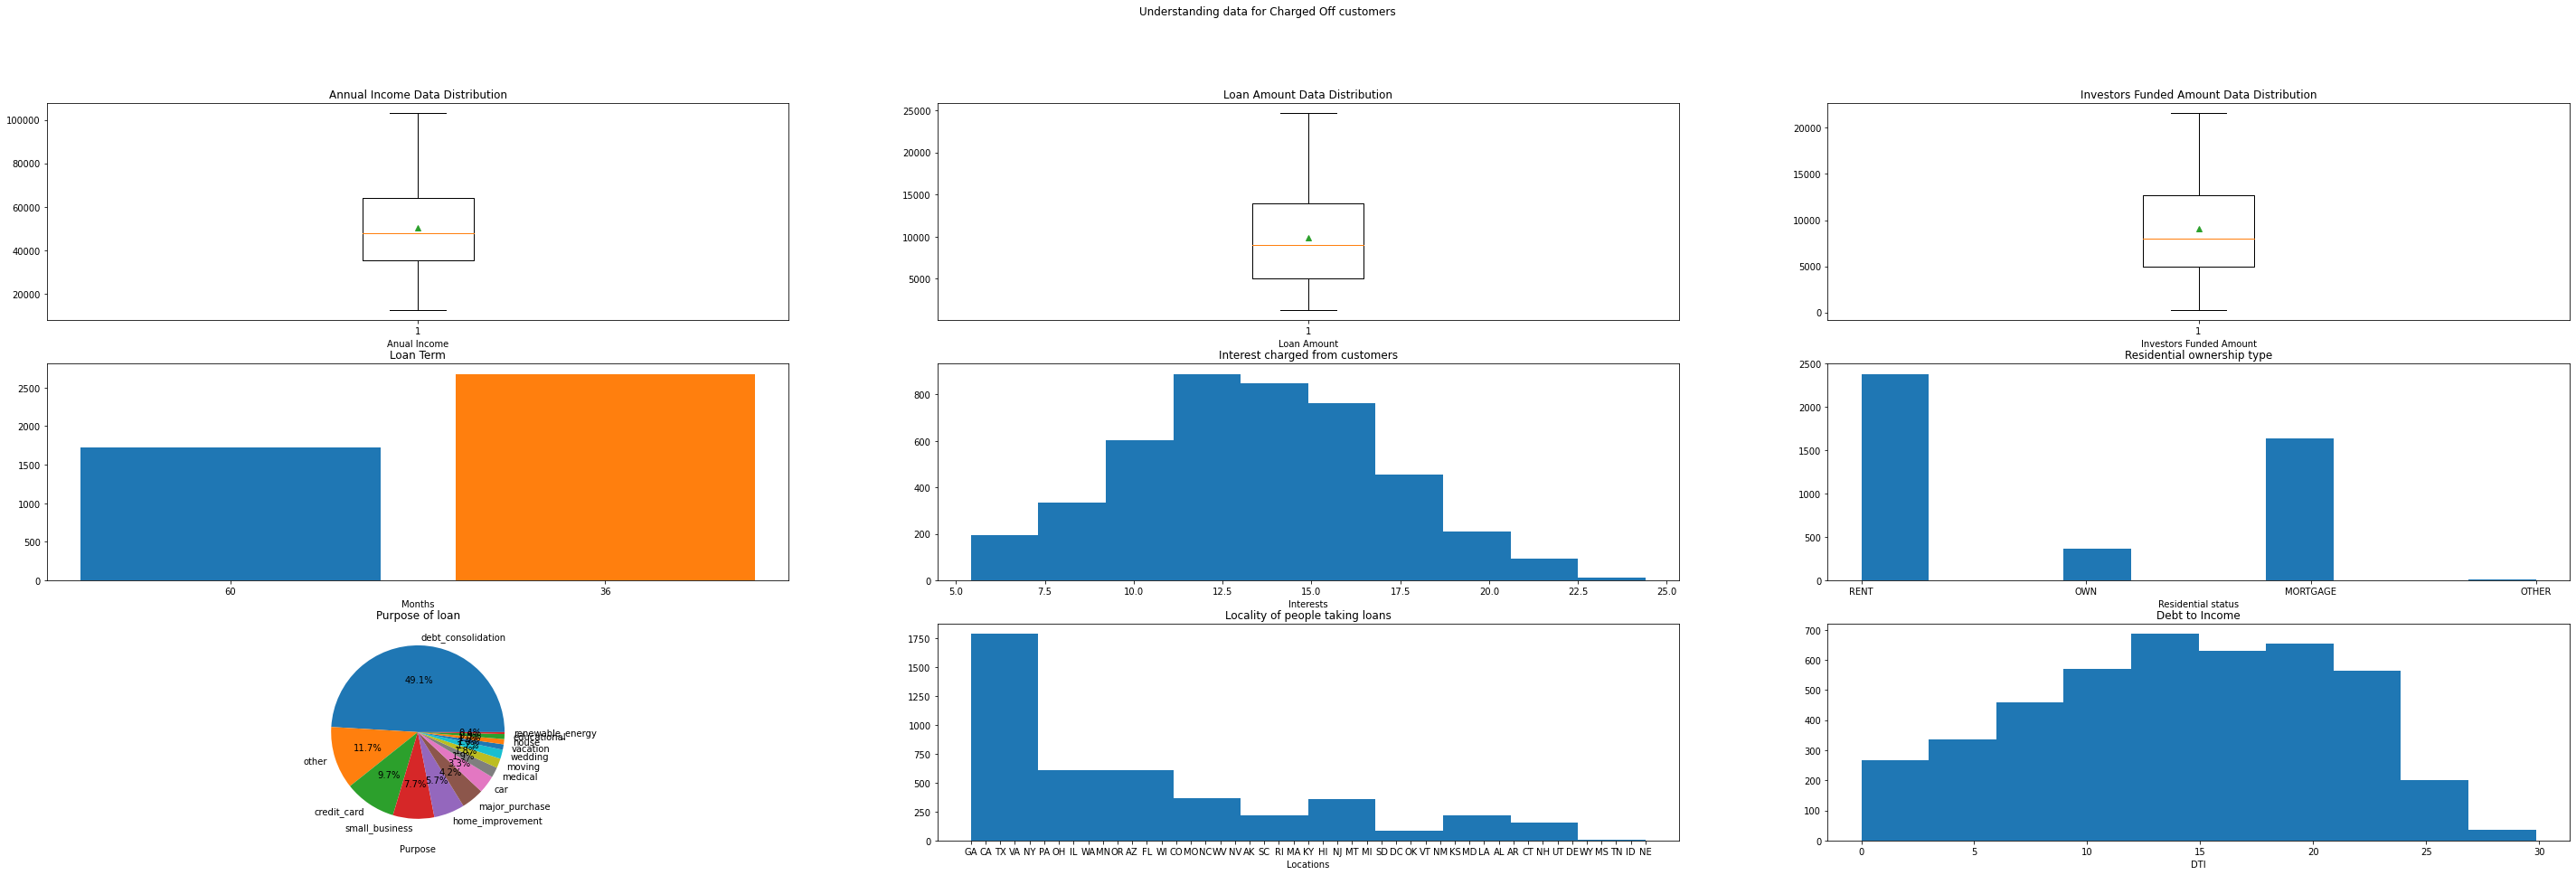

In [18]:
# Describe the Summary of data post cleaning operation

fig, graphs = plt.subplots(3,3)
fig.set_figwidth(50)
fig.set_figheight(15)
fig.suptitle('Understanding data for Charged Off customers')

graphs[0][0].boxplot(chargedoff_dataset.annual_inc, showmeans=True)
graphs[0][0].set_title('Annual Income Data Distribution')
graphs[0][0].set_xlabel('Anual Income')

graphs[0][1].boxplot(chargedoff_dataset.loan_amnt, showmeans=True)
graphs[0][1].set_title('Loan Amount Data Distribution')
graphs[0][1].set_xlabel('Loan Amount')

graphs[0][2].boxplot(chargedoff_dataset.funded_amnt_inv, showmeans=True )
graphs[0][2].set_title('Investors Funded Amount Data Distribution')
graphs[0][2].set_xlabel('Investors Funded Amount')

graphs[1][0].bar('60', chargedoff_dataset.term[chargedoff_dataset.term == '60'].count())
graphs[1][0].bar('36', chargedoff_dataset.term[chargedoff_dataset.term == '36'].count())
graphs[1][0].set_title('Loan Term')
graphs[1][0].set_xlabel('Months')

graphs[1][1].hist(chargedoff_dataset.int_rate)
graphs[1][1].set_title('Interest charged from customers')
graphs[1][1].set_xlabel('Interests')

graphs[1][2].hist(chargedoff_dataset.home_ownership)
graphs[1][2].set_title('Residential ownership type')
graphs[1][2].set_xlabel('Residential status')

graphs[2][0].pie(chargedoff_dataset.purpose.value_counts(), labels=chargedoff_dataset.purpose.value_counts().keys().tolist(), autopct='%1.1f%%')
#graphs[2][0].hist(chargedoff_dataset.purpose.value_counts())
graphs[2][0].set_title('Purpose of loan')
graphs[2][0].set_xlabel('Purpose')
#graphs[2][0].tick_params(labelrotation=90)

graphs[2][1].hist(chargedoff_dataset.addr_state)
graphs[2][1].set_title('Locality of people taking loans')
graphs[2][1].set_xlabel('Locations')

graphs[2][2].hist(chargedoff_dataset.dti)
graphs[2][2].set_title('Debt to Income')
graphs[2][2].set_xlabel('DTI')


#plt.boxplot([chargedoff_dataset.annual_inc, chargedoff_dataset.loan_amnt])

plt.draw()


<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
From above graphs, I can conclude that, in historic data for charged off customers most defaulters had :
<ol>
<li>Annual income between 22500 ~ 36000</li>
<li>Loan amount requested 4100 ~5500</li>
<li>Loan amount financed 4100 ~ 5500</li>
<li>Duration of repayment 36 Months</li>
<li>Interest rates 10% ~ 18%</li>
<li>Residential type Rented</li>
<li>Purposed stated for loan Debt Consolidation</li>
<li>Region from where loan was taken CA, CO, SC, KY</li>
<li>Debt to income ratio 0 ~ 25</li>
</ol>

<h4>Hypothetically I can conclude, if a applicant is from [CA, CO, SC, KY] regions with annual income in [22500 ~ 36000] bracket, applying for amount [4100 ~ 5500] for duration of 36 months staying in rented appartment should be <b>DENIED</b> loan to reduce risk of credit loss.</h4>

However, this is just a initial hypothesis. 
</div>

<hr>
<h5 style="border:1px solid green;padding:10px 10px 10px 10px;text-align: center;"><span style="color: green;">
Step 4: Proving Hypothesis by establishing more concrete and meaningful relations [Correlation vs Causality]
</h5>

In [19]:
# Data Types of final data 
chargedoff_dataset.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util              object
total_acc                int64
application_type        object
dtype: object

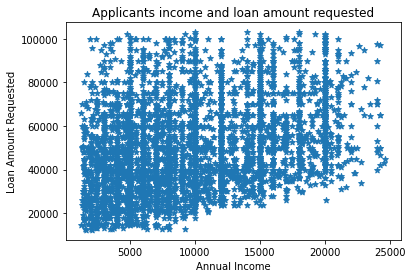

In [22]:
# Applicants with income 22500 ~ 36000 applying for loan 
plt.scatter(chargedoff_dataset.loan_amnt, chargedoff_dataset.annual_inc,  marker='*', cmap='plasma')
plt.title("Applicants income and loan amount requested")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount Requested")
plt.show()

<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
Among charged off applicants, Dense cluster is seen with annual salary above 1000 and below 10000. These applicants were applying loan in between 10000 to 55000.
</div>

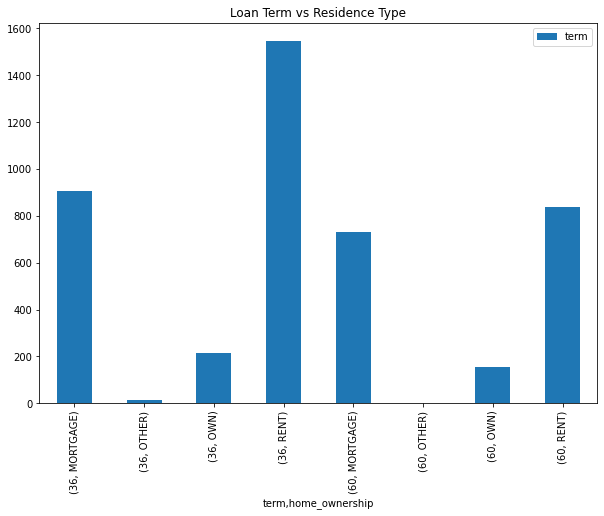

In [54]:
chargedoff_dataset.groupby(['term', 'home_ownership']).term.count().plot.bar(figsize=(10,7), title='Loan Term vs Residence Type', legend=True)
plt.show()

<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
Among charged off applicants, Defaulters mostly have rented accomodation and has selected term to be 36 months for repayment.
</div>

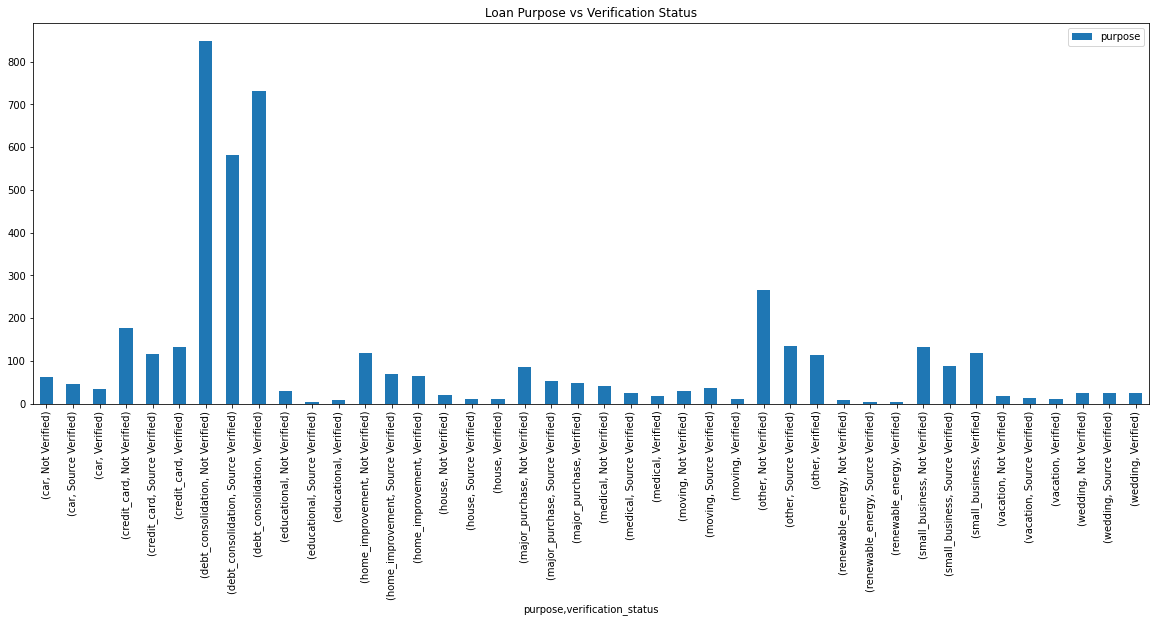

In [72]:
chargedoff_dataset.groupby(['purpose', 'verification_status']).purpose.count().plot.bar(figsize=(20,7), title='Loan Purpose vs Verification Status', legend=True)
plt.show()

<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
Many People have taken loan for debt_consolidation who have defaulted on loan. more then 800 of these were Not Verified, source verified and only 750 were verified. 
</div>

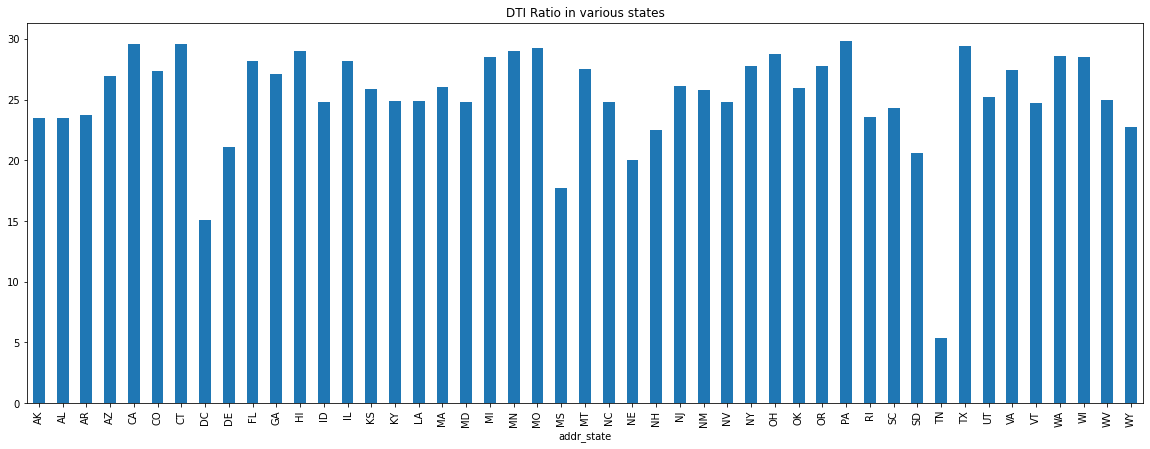

In [76]:
chargedoff_dataset.groupby(['addr_state']).dti.max().plot.bar(figsize=(20,7), title='DTI Ratio in various states', legend=False)
plt.show()


<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
People from DC, MS, TN have lowest DTI ratio, hence I can conclude that defaulters belong to these states may be paying less debts from their income still they have defaulted the loan 
</div>

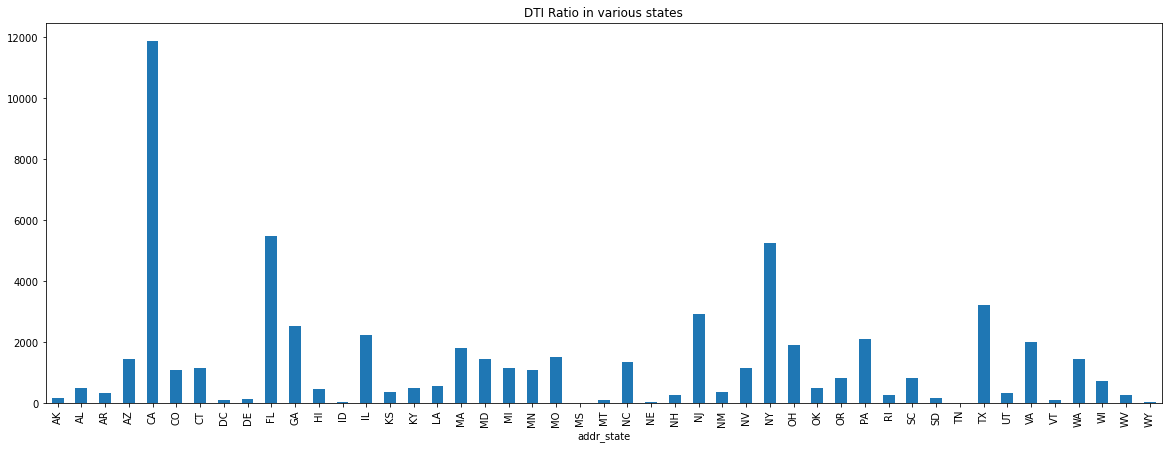

In [77]:
chargedoff_dataset.groupby(['addr_state']).dti.sum().plot.bar(figsize=(20,7), title='DTI Ratio in various states', legend=False)
plt.show()

<div style="text-align: justify;color:blue;font-size: 18px;font-family: Times New Roman, Times, serif;">
People from CA outnumbers the DTI ratio being highest, this indicates that people from CA are more in debt then any other states.
</div>